In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Modules Imported")

Modules Imported


In [2]:
#Connect to drive
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("drive/MyDrive/Honours/")
os.listdir()

['assist.csv',
 'ZZ_EEDI_BKT_v1_(JAKE).ipynb',
 'ZZ_Eedi data first exploration.R',
 'investigate.py',
 'BKT.py',
 'Formatting.ipynb',
 '.ipynb_checkpoints',
 'data',
 'Docs N Stuff',
 'BKT.ipynb',
 'student1.csv',
 'student2.csv',
 'student3.csv',
 'running_hot_again.csv',
 'running_hot.csv',
 'ccrs.csv',
 'predictions.csv',
 'grouped_predictions.csv',
 'model_params',
 'average_mastery_predictions.png',
 'bkt_example.png',
 'fast_and_slow.png',
 'trimmed_assist.csv',
 'assist_ccrs.csv',
 'preds.csv',
 'assist_preds.csv',
 'assist_master.csv',
 'assist_params.csv',
 'very_slow.png',
 'Marked_Examlpes.png',
 'Marked_Examples.png',
 'Marked_all.png',
 'Marked_fast_slow.png',
 'Marked_renames.png',
 'Marked_renamed.png']

In [4]:
# load in data
train_data = pd.read_csv("data/train_data/train_task_3_4.csv")
students = pd.read_csv("data/metadata/student_metadata_task_3_4.csv")
subjects = pd.read_csv("data/metadata/subject_metadata.csv")
questions = pd.read_csv("data/metadata/question_metadata_task_3_4.csv")
answers = pd.read_csv("data/metadata/answer_metadata_task_3_4.csv")
level1s = pd.read_csv("data/level1_questions.csv")
level2s = pd.read_csv("data/level2_questions.csv")
master = pd.read_csv("data/master.csv")
ccrs = pd.read_csv("data/ccrs.csv")
print("Data loaded")

Data loaded


In [5]:
#The questions with multiple level 2 topics are question 2 and 849
#These should already be removed, but just in case
master = master[(master["QuestionId"] != 2) & (master["QuestionId"] != 849)]
questions = questions[(questions["QuestionId"] != 2) & (questions["QuestionId"] != 849)]
level1s = level1s[(level1s["QuestionId"] != 2) & (level1s["QuestionId"] != 849)]
level2s = level2s[(level2s["QuestionId"] != 2) & (level2s["QuestionId"] != 849)]

In [6]:
master.rename(columns = {"Unnamed: 0": "Order"}, inplace = True)
master

,Order,QuestionId,UserId,AnswerId,IsCorrect,Name,SubjectId,DateAnswered
0,0,182,1,1181805,0,Units of Measurement,98,2019-10-11 13:15:00.000
1,1,202,1,287821,0,Units of Measurement,98,2019-10-11 13:17:00.000
2,2,420,1,925509,1,Units of Measurement,98,2019-10-11 13:17:00.000
3,3,403,1,1192500,1,Units of Measurement,98,2019-10-11 13:18:00.000
4,4,691,1,522876,1,Units of Measurement,98,2019-10-11 13:19:00.000
...,...,...,...,...,...,...,...,...
1378220,1378220,576,6147,1120212,0,Transformations,278,2020-04-17 12:25:00.000
1378221,1378221,582,6147,772296,1,Transformations,278,2020-04-17 12:27:00.000
1378222,1378222,271,6147,1373908,0,Transformations,278,2020-04-17 12:29:00.000
1378223,1378223,70,6147,337145,0,Transformations,278,2020-04-17 12:34:00.000


In [8]:
students

,UserId,Gender,DateOfBirth,PremiumPupil
0,3837,2,2007-10-01 00:00:00.000,0.0
1,207,0,NaN,NaN
2,3581,2,2008-03-01 00:00:00.000,0.0
3,6028,2,2008-01-01 00:00:00.000,0.0
4,1451,0,NaN,NaN
...,...,...,...,...
6143,5831,0,NaN,NaN
6144,3165,2,2008-01-01 00:00:00.000,0.0
6145,273,2,NaN,NaN
6146,2169,2,2008-03-01 00:00:00.000,0.0


In [9]:
print(len(level2s['Name'].unique()))

25


In [10]:
print(master.shape)
print(students.shape)

(1378225, 8)
(6148, 4)


In [7]:
masterDemo = pd.merge(master, students, how = 'inner', left_on = "UserId", right_on = "UserId")
print(masterDemo.shape)
masterDemo = masterDemo.dropna().reset_index(drop=True)
masterDemo

(1378225, 11)


,Order,QuestionId,UserId,AnswerId,IsCorrect,Name,SubjectId,DateAnswered,Gender,DateOfBirth,PremiumPupil
0,333,199,3,1160716,1,Negative Numbers,42,2019-10-30 18:48:00.000,1,2008-05-01 00:00:00.000,0.0
1,334,911,3,1114855,1,Negative Numbers,42,2019-10-30 18:50:00.000,1,2008-05-01 00:00:00.000,0.0
2,335,405,3,376576,1,Negative Numbers,42,2019-10-30 18:54:00.000,1,2008-05-01 00:00:00.000,0.0
3,336,547,3,968084,1,Negative Numbers,42,2019-10-30 18:58:00.000,1,2008-05-01 00:00:00.000,0.0
4,337,461,3,185605,1,Negative Numbers,42,2019-11-08 08:01:00.000,1,2008-05-01 00:00:00.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
704720,1376726,323,6142,1060331,0,Circles,77,2020-01-06 10:01:00.000,1,2008-05-01 00:00:00.000,1.0
704721,1376727,870,6142,105721,0,Circles,77,2020-01-06 10:02:00.000,1,2008-05-01 00:00:00.000,1.0
704722,1376728,586,6142,588051,0,"Construction, Loci and Scale Drawing",83,2020-01-06 10:34:00.000,1,2008-05-01 00:00:00.000,1.0
704723,1376729,14,6142,648125,0,"Construction, Loci and Scale Drawing",83,2020-01-06 10:35:00.000,1,2008-05-01 00:00:00.000,1.0


In [12]:
print(masterDemo['DateOfBirth'].min())
print(masterDemo['DateOfBirth'].max())

2006-01-01 00:00:00.000
2008-08-01 00:00:00.000


In [13]:
print(masterDemo['DateAnswered'].min())
print(masterDemo['DateAnswered'].max())

2019-09-11 17:18:00.000
2020-04-29 10:11:00.000


In [8]:
masterDemo.drop(["DateOfBirth"], axis = 1, inplace = True)

In [9]:
# want to implement BKT as in https://educationaldatamining.org/EDM2021/virtual/static/pdf/EDM21_paper_237.pdf
!pip install pyBKT

# Import all required packages including pyBKT.models.Model!
from pyBKT.models import Model
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.6 MB/s eta 0:00:00


In [10]:
!pip install sklearn
from sklearn.model_selection import GroupShuffleSplit

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [11]:
# split data into test / train based on user ID
train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7).split(master, groups = master['UserId']))
print(test_inds)
print(train_inds)
print(len(test_inds))
print(len(train_inds))

[    333     334     335 ... 1377282 1377283 1377284]
[      0       1       2 ... 1378222 1378223 1378224]
274016
1104209


In [12]:
train_data_split = master.iloc[train_inds]
test_data_split = master.iloc[test_inds]

train_users = set(train_data_split.UserId)
test_users = set(test_data_split.UserId)

print(len(set(master.UserId)))
# 4918
print(len(train_users))
# 3934
print(len(test_users))
# 984
# disjoint partitiong of users

4918
3934
984


In [13]:
# Note that the seed chosen is so we can consistently
# replicate the results and avoid as much randomness
# as possible.
model = Model(seed = 42, num_fits = 1, parallel = True)
print("model defined")

model defined


In [14]:
# set random seed before running the model
import numpy as np
np.random.seed(1234)
# format column names so EEDI data works with this model

# For other non-Assistments/CogTutor style datasets, we will need to specify the
# columns corresponding to each required column (i.e. the user ID, correct/incorrect).
# For that, we use a defaults dictionary.
# In this case, the order ID that pyBKT expects is specified by the column row in the
# dataset, the skill_name is specified by a column skill_t and the correctness is specified
# by the answer column in the dataset.
defaults = {'user_id': 'UserId', 'order_id': 'Order', 'skill_name': 'Name', 'correct': 'IsCorrect'}
# Fit using the defaults (column mappings) specified in the dictionary.
model.fit(data = train_data_split, defaults = defaults)
print("model fit")

model fit


In [ ]:
params = model.params()
test = str(params.iloc[0])
print(test)

value   0.13689
Name: (Units of Measurement, prior, default), dtype: float64


In [ ]:
params

In [ ]:
skills = []
for i in range(0, len(params), 5):
  temp = str(params.iloc[i])

  name = temp.split('(')[1].split(', prior, default), dtype: float64')[0]
  print(name)
  skills.append(name)

In [ ]:
priors = []
learns = []
guesses = []
slips = []

for i in range(0, len(params), 5):
  priors.append(params.iloc[i])

for i in range(1, len(params), 5):
  learns.append(params.iloc[i])

for i in range(2, len(params), 5):
  guesses.append(params.iloc[i])

for i in range(3, len(params), 5):
  slips.append(params.iloc[i])

priors = np.array(priors)
learns = np.array(learns)
guesses = np.array(guesses)
slips = np.array(slips)

In [ ]:
params = pd.DataFrame(data = skills, columns = ['Name'])
params['priors'] = priors
params['learns'] = learns
params['guesses'] = guesses
params['slips'] = slips

In [ ]:
params

In [ ]:
params.to_csv('model_params.csv', encoding = 'utf-8-sig')
files.download('model_params.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("priors: " + str(priors.mean()))
print("learns: " + str(learns.mean()))
print("guesses: " + str(guesses.mean()))
print("slips: " + str(slips.mean()))

priors: 0.309782340654617
learns: 0.015560296379153243
guesses: 0.3656153664765297
slips: 0.1914757318892542


In [ ]:
answers = [0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1]
userIds = [0] * 16
subjectIds = [39] * 16
subjectNames = ["Fractions"] * 16
order = np.arange(0,16)
print(order)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [ ]:
synthetic = pd.DataFrame(data = answers, columns = ['IsCorrect'])
synthetic["UserId"] = userIds
synthetic["SubjectId"] = subjectIds
synthetic["Name"] =  subjectNames
synthetic["Order"] = order
synthetic

,IsCorrect,UserId,SubjectId,Name,Order
0,0,0,39,Fractions,0
1,1,0,39,Fractions,1
2,0,0,39,Fractions,2
3,1,0,39,Fractions,3
4,1,0,39,Fractions,4
5,1,0,39,Fractions,5
6,1,0,39,Fractions,6
7,1,0,39,Fractions,7
8,0,0,39,Fractions,8
9,1,0,39,Fractions,9


In [ ]:
synthPreds = model.predict(data = synthetic)

In [ ]:
synthPredsArray = np.array(np.round(synthPreds["state_predictions"], decimals = 5))
synthPredsArray

array([0.34129, 0.16432, 0.32328, 0.15353, 0.30591, 0.51681, 0.72178,
       0.86285, 0.93848, 0.85211, 0.93321, 0.84069, 0.66599, 0.82863,
       0.64628, 0.40862])

In [ ]:
#Evaluate accuracy
training_acc = model.evaluate(data = train_data_split, metric = 'auc')
training_f1 = model.evaluate(data = train_data_split, metric = 'f1_score')
test_acc = model.evaluate(data = test_data_split, metric = 'auc')
test_f1 = model.evaluate(data = test_data_split, metric = 'f1_score')
print("training AUC: " + str(training_acc))
print("training F1:  " + str(training_f1))
print("test AUC:     " + str(test_acc))
print("test F1:      " + str(test_f1))

KeyboardInterrupt: ignored

In [ ]:
#val_training_acc = model.crossvalidate(data = train_data_split, folds = 5, defaults = defaults, metric = 'auc')
#val_training_f1 = model.crossvalidate(data = train_data_split, folds = 5, defaults = defaults, metric = 'f1_score')
#val_test_acc = model.crossvalidate(data = test_data_split, folds = 5, defaults = defaults, metric = 'auc')
#val_test_f1 = model.crossvalidate(data = test_data_split, folds = 5, defaults = defaults, metric = 'f1_score')
#print("validation training AUC: " + str(val_training_acc["auc"].mean()))
#print("validation training F1: " + str(val_training_f1["f1_score"].mean()))
#print("validation test AUC: " + str(val_test_acc["auc"].mean()))
#print("validation test F1: " + str(val_test_f1["f1_score"].mean()))

In [15]:
# Make predictions on the dataset
preds = model.predict(data = test_data_split)

In [ ]:
preds

,Order,QuestionId,UserId,AnswerId,IsCorrect,Name,SubjectId,DateAnswered,correct_predictions,state_predictions
333,333,199,3,1160716,1,Negative Numbers,42,2019-10-30 18:48:00.000,0.54337,0.41373
334,334,911,3,1114855,1,Negative Numbers,42,2019-10-30 18:50:00.000,0.59497,0.56575
335,335,405,3,376576,1,Negative Numbers,42,2019-10-30 18:54:00.000,0.64266,0.70624
336,336,547,3,968084,1,Negative Numbers,42,2019-10-30 18:58:00.000,0.67992,0.81603
337,337,461,3,185605,1,Negative Numbers,42,2019-11-08 08:01:00.000,0.70541,0.89110
...,...,...,...,...,...,...,...,...,...,...
1377280,1377280,944,6144,1031224,0,"Factors, Multiples and Primes",37,2020-04-20 11:39:00.000,0.42851,0.00733
1377281,1377281,857,6144,294853,0,"Factors, Multiples and Primes",37,2020-04-20 11:39:00.000,0.42733,0.00418
1377282,1377282,918,6144,1113705,0,"Factors, Multiples and Primes",37,2020-04-20 11:39:00.000,0.42692,0.00308
1377283,1377283,395,6144,1459512,0,"Factors, Multiples and Primes",37,2020-04-20 11:39:00.000,0.42677,0.00271


In [ ]:
preds.groupby('IsCorrect').mean()

<ipython-input-48-f40528f8cafd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  preds.groupby('IsCorrect').mean()


,Order,QuestionId,UserId,AnswerId,SubjectId,correct_predictions,state_predictions
IsCorrect,,,,,,,
0,"676,534.61466",459.80774,"2,980.93581","753,860.51635",94.14736,0.50347,0.29926
1,"673,712.11113",475.38684,"2,968.24856","755,087.11701",89.22143,0.60743,0.56177


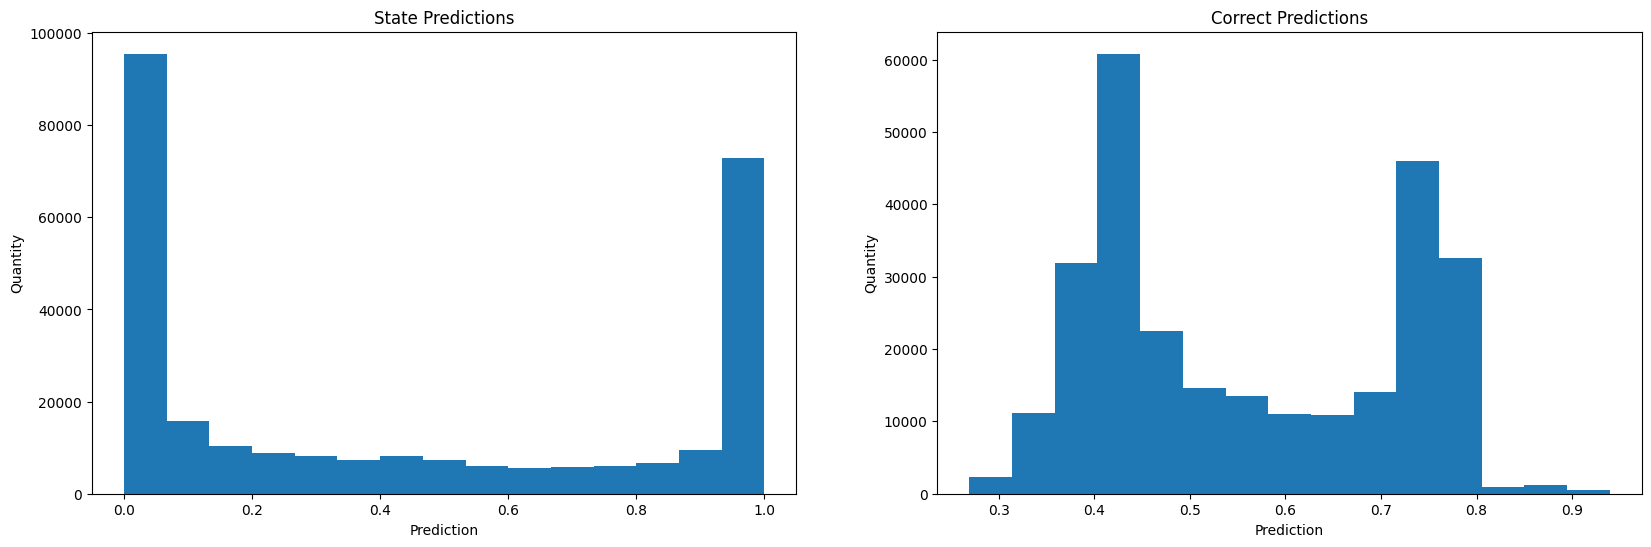

In [ ]:
# what drives high predictions? What are highest and lowest predictions?

#preds.describe()
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))

x = preds.state_predictions
y = preds.correct_predictions

ax1.hist(x, bins = 15)
ax2.hist(y, bins = 15)

ax1.set_title("State Predictions")
ax1.set_xlabel("Prediction")
ax1.set_ylabel("Quantity")
ax2.set_title("Correct Predictions")
ax2.set_xlabel("Prediction")
ax2.set_ylabel("Quantity")
plt.show()
# cluster of state predictions at 0 and 1 - what do these people look like?

In [ ]:
# filter data to latest chronological value for each topic
preds_cutoff = preds.loc[preds.groupby(["UserId","Name"]).Order.idxmax()]

# define cutoff values
preds_cutoff['p0'] = preds_cutoff.state_predictions.apply(lambda x: 1 if x>=0 else 0)
preds_cutoff['p50'] = preds_cutoff.state_predictions.apply(lambda x: 1 if x>=0.5 else 0)
preds_cutoff['p60'] = preds_cutoff.state_predictions.apply(lambda x: 1 if x>=0.6 else 0)
preds_cutoff['p70'] = preds_cutoff.state_predictions.apply(lambda x: 1 if x>=0.7 else 0)
preds_cutoff['p80'] = preds_cutoff.state_predictions.apply(lambda x: 1 if x>=0.8 else 0)
preds_cutoff['p90'] = preds_cutoff.state_predictions.apply(lambda x: 1 if x>=0.9 else 0)

# need to merge on topics

In [ ]:
level1s.drop(["Unnamed: 0", "SubjectId"], axis = 1, inplace = True)
level1s

,QuestionId,Name
0,684,Geometry and Measure
1,87,Geometry and Measure
2,679,Geometry and Measure
3,685,Geometry and Measure
4,222,Geometry and Measure
...,...,...
943,313,Number
944,239,Number
945,397,Number
946,897,Number


In [ ]:
preds_data_aug = preds_cutoff.merge(level1s,how='left',on="QuestionId")

In [ ]:
preds_data_summarise = preds_data_aug[['Name_y','p0','p50','p60','p70','p80','p90']].groupby("Name_y").sum()
preds_data_map = preds_data_summarise[['p0','p50','p60','p70','p80','p90']].div(preds_data_summarise.p0, axis=0).reset_index()
preds_data_map = pd.melt(preds_data_map, id_vars = ["Name_y"], var_name = "mastery_standard", value_name = "pct")

In [ ]:
preds_data_map

,Name_y,mastery_standard,pct
0,Algebra,p0,1.00000
1,Geometry and Measure,p0,1.00000
2,Number,p0,1.00000
3,Algebra,p50,0.26750
4,Geometry and Measure,p50,0.29814
5,Number,p50,0.39891
6,Algebra,p60,0.24602
7,Geometry and Measure,p60,0.26471
8,Number,p60,0.37553
9,Algebra,p70,0.22872


<ipython-input-55-c8bf054d2f1a>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  preds_data_map.pivot("mastery_standard", "Name_y", "pct").plot(kind='bar')


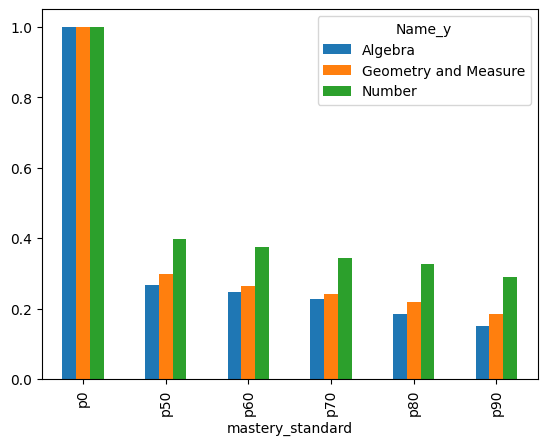

In [ ]:
import matplotlib.pyplot as plt

preds_data_map.pivot("mastery_standard", "Name_y", "pct").plot(kind='bar')

plt.show()

In [16]:
predsDemo = pd.merge(preds, students, how = 'inner', left_on = "UserId", right_on = "UserId")
predsDemo

,Order,QuestionId,UserId,AnswerId,IsCorrect,Name,SubjectId,DateAnswered,correct_predictions,state_predictions,Gender,DateOfBirth,PremiumPupil
0,333,199,3,1160716,1,Negative Numbers,42,2019-10-30 18:48:00.000,0.54337,0.41373,1,2008-05-01 00:00:00.000,0.00000
1,334,911,3,1114855,1,Negative Numbers,42,2019-10-30 18:50:00.000,0.59497,0.56575,1,2008-05-01 00:00:00.000,0.00000
2,335,405,3,376576,1,Negative Numbers,42,2019-10-30 18:54:00.000,0.64266,0.70624,1,2008-05-01 00:00:00.000,0.00000
3,336,547,3,968084,1,Negative Numbers,42,2019-10-30 18:58:00.000,0.67992,0.81603,1,2008-05-01 00:00:00.000,0.00000
4,337,461,3,185605,1,Negative Numbers,42,2019-11-08 08:01:00.000,0.70541,0.89110,1,2008-05-01 00:00:00.000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274011,1377280,944,6144,1031224,0,"Factors, Multiples and Primes",37,2020-04-20 11:39:00.000,0.42851,0.00733,2,NaN,NaN
274012,1377281,857,6144,294853,0,"Factors, Multiples and Primes",37,2020-04-20 11:39:00.000,0.42733,0.00418,2,NaN,NaN
274013,1377282,918,6144,1113705,0,"Factors, Multiples and Primes",37,2020-04-20 11:39:00.000,0.42692,0.00308,2,NaN,NaN
274014,1377283,395,6144,1459512,0,"Factors, Multiples and Primes",37,2020-04-20 11:39:00.000,0.42677,0.00271,2,NaN,NaN


In [17]:
ccrs.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [18]:
ccrs

,UserId,SubjectId,Name,CCR
0,1,37,"Factors, Multiples and Primes",4
1,1,40,"Indices, Powers and Roots",3
2,1,98,Units of Measurement,3
3,1,144,Basic Arithmetic,3
4,2,37,"Factors, Multiples and Primes",2
...,...,...,...,...
68433,6147,154,Solving Equations,7
68434,6147,156,Formula,7
68435,6147,174,2D Names and Properties of Shapes,3
68436,6147,178,Perimeter and Area,6


In [19]:
predsDemo = pd.merge(predsDemo, ccrs, how = 'inner', left_on = ["UserId", "SubjectId"], right_on = ["UserId", "SubjectId"])
print(predsDemo.dtypes)

Order                    int64
QuestionId               int64
UserId                   int64
AnswerId                 int64
IsCorrect                int64
Name_x                  object
SubjectId                int64
DateAnswered            object
correct_predictions    float64
state_predictions      float64
Gender                   int64
DateOfBirth             object
PremiumPupil           float64
Name_y                  object
CCR                      int64
dtype: object


In [ ]:
predsDemo

,Order,QuestionId,UserId,AnswerId,IsCorrect,Name_x,SubjectId,DateAnswered,correct_predictions,state_predictions,Gender,DateOfBirth,PremiumPupil,Name_y,CCR
0,333,199,3,1160716,1,Negative Numbers,42,2019-10-30 18:48:00.000,0.54337,0.41373,1,2008-05-01 00:00:00.000,0.00000,Negative Numbers,78
1,334,911,3,1114855,1,Negative Numbers,42,2019-10-30 18:50:00.000,0.59497,0.56575,1,2008-05-01 00:00:00.000,0.00000,Negative Numbers,78
2,335,405,3,376576,1,Negative Numbers,42,2019-10-30 18:54:00.000,0.64266,0.70624,1,2008-05-01 00:00:00.000,0.00000,Negative Numbers,78
3,336,547,3,968084,1,Negative Numbers,42,2019-10-30 18:58:00.000,0.67992,0.81603,1,2008-05-01 00:00:00.000,0.00000,Negative Numbers,78
4,337,461,3,185605,1,Negative Numbers,42,2019-11-08 08:01:00.000,0.70541,0.89110,1,2008-05-01 00:00:00.000,0.00000,Negative Numbers,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274011,1377264,569,6144,1052480,0,Similarity and Congruency,272,2020-04-20 11:37:00.000,0.32067,0.04015,2,NaN,NaN,Similarity and Congruency,1
274012,1377265,713,6144,1262904,0,Similarity and Congruency,272,2020-04-20 11:37:00.000,0.31280,0.01903,2,NaN,NaN,Similarity and Congruency,1
274013,1377269,784,6144,1290603,1,Similarity and Congruency,272,2020-04-20 11:38:00.000,0.30904,0.00892,2,NaN,NaN,Similarity and Congruency,1
274014,1377272,245,6144,288691,0,Similarity and Congruency,272,2020-04-20 11:38:00.000,0.31300,0.01957,2,NaN,NaN,Similarity and Congruency,1


In [20]:
predsDemo.drop(["Name_y", "Order"], axis = 1, inplace = True)
predsDemo.rename(columns = {"Name_x": "Name", "CCR": "max_CCR_for_subject"}, inplace = True)
print(len(predsDemo))
predsDemo=predsDemo.dropna().reset_index(drop=True)
print(len(predsDemo))

274016
139533


In [ ]:
predsDemo

,QuestionId,UserId,AnswerId,IsCorrect,Name,SubjectId,DateAnswered,correct_predictions,state_predictions,Gender,DateOfBirth,PremiumPupil,max_CCR_for_subject
0,199,3,1160716,1,Negative Numbers,42,2019-10-30 18:48:00.000,0.54337,0.41373,1,2008-05-01 00:00:00.000,0.00000,78
1,911,3,1114855,1,Negative Numbers,42,2019-10-30 18:50:00.000,0.59497,0.56575,1,2008-05-01 00:00:00.000,0.00000,78
2,405,3,376576,1,Negative Numbers,42,2019-10-30 18:54:00.000,0.64266,0.70624,1,2008-05-01 00:00:00.000,0.00000,78
3,547,3,968084,1,Negative Numbers,42,2019-10-30 18:58:00.000,0.67992,0.81603,1,2008-05-01 00:00:00.000,0.00000,78
4,461,3,185605,1,Negative Numbers,42,2019-11-08 08:01:00.000,0.70541,0.89110,1,2008-05-01 00:00:00.000,0.00000,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139528,884,6140,1036864,1,Perimeter and Area,178,2020-03-31 07:46:00.000,0.51536,0.40694,2,2008-03-01 00:00:00.000,0.00000,4
139529,631,6140,14330,1,Perimeter and Area,178,2020-03-31 07:46:00.000,0.58302,0.58585,2,2008-03-01 00:00:00.000,0.00000,4
139530,172,6140,1237906,1,Perimeter and Area,178,2020-03-31 07:48:00.000,0.64296,0.74435,2,2008-03-01 00:00:00.000,0.00000,4
139531,869,6140,1026994,0,Perimeter and Area,178,2020-03-31 07:48:00.000,0.68553,0.85690,2,2008-03-01 00:00:00.000,0.00000,4


In [21]:
threeCCR = []
fiveCCR = []
tenCCR = []

for i in range(len(predsDemo)):
  ccr = predsDemo.iloc[i]["max_CCR_for_subject"]
  if (ccr >= 10):
    threeCCR.append(1)
    fiveCCR.append(1)
    tenCCR.append(1)
  elif (ccr >= 5):
    threeCCR.append(1)
    fiveCCR.append(1)
    tenCCR.append(0)
  elif (ccr >= 3):
    threeCCR.append(1)
    fiveCCR.append(0)
    tenCCR.append(0)
  else:
    threeCCR.append(0)
    fiveCCR.append(0)
    tenCCR.append(0)

In [22]:
predsDemo["3 CCR"] = threeCCR
predsDemo["5 CCR"] = fiveCCR
predsDemo["10 CCR"] = tenCCR
predsDemo

,QuestionId,UserId,AnswerId,IsCorrect,Name,SubjectId,DateAnswered,correct_predictions,state_predictions,Gender,DateOfBirth,PremiumPupil,max_CCR_for_subject,3 CCR,5 CCR,10 CCR
0,199,3,1160716,1,Negative Numbers,42,2019-10-30 18:48:00.000,0.54337,0.41373,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
1,911,3,1114855,1,Negative Numbers,42,2019-10-30 18:50:00.000,0.59497,0.56575,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
2,405,3,376576,1,Negative Numbers,42,2019-10-30 18:54:00.000,0.64266,0.70624,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
3,547,3,968084,1,Negative Numbers,42,2019-10-30 18:58:00.000,0.67992,0.81603,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
4,461,3,185605,1,Negative Numbers,42,2019-11-08 08:01:00.000,0.70541,0.89110,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139528,884,6140,1036864,1,Perimeter and Area,178,2020-03-31 07:46:00.000,0.51536,0.40694,2,2008-03-01 00:00:00.000,0.00000,4,1,0,0
139529,631,6140,14330,1,Perimeter and Area,178,2020-03-31 07:46:00.000,0.58302,0.58585,2,2008-03-01 00:00:00.000,0.00000,4,1,0,0
139530,172,6140,1237906,1,Perimeter and Area,178,2020-03-31 07:48:00.000,0.64296,0.74435,2,2008-03-01 00:00:00.000,0.00000,4,1,0,0
139531,869,6140,1026994,0,Perimeter and Area,178,2020-03-31 07:48:00.000,0.68553,0.85690,2,2008-03-01 00:00:00.000,0.00000,4,1,0,0


In [23]:
#Should already be sorted, but can't hurt to double check
predsDemo.sort_values(['UserId', 'DateAnswered'], ascending=[True, True], inplace = True)
predsDemo

,QuestionId,UserId,AnswerId,IsCorrect,Name,SubjectId,DateAnswered,correct_predictions,state_predictions,Gender,DateOfBirth,PremiumPupil,max_CCR_for_subject,3 CCR,5 CCR,10 CCR
0,199,3,1160716,1,Negative Numbers,42,2019-10-30 18:48:00.000,0.54337,0.41373,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
1,911,3,1114855,1,Negative Numbers,42,2019-10-30 18:50:00.000,0.59497,0.56575,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
2,405,3,376576,1,Negative Numbers,42,2019-10-30 18:54:00.000,0.64266,0.70624,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
3,547,3,968084,1,Negative Numbers,42,2019-10-30 18:58:00.000,0.67992,0.81603,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
4,461,3,185605,1,Negative Numbers,42,2019-11-08 08:01:00.000,0.70541,0.89110,1,2008-05-01 00:00:00.000,0.00000,78,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139513,271,6140,342151,0,Transformations,278,2020-04-03 06:31:00.000,0.41242,0.22935,2,2008-03-01 00:00:00.000,0.00000,3,1,0,0
139514,247,6140,865533,1,Transformations,278,2020-04-03 06:32:00.000,0.37428,0.12243,2,2008-03-01 00:00:00.000,0.00000,3,1,0,0
139515,411,6140,1199486,1,Transformations,278,2020-04-03 06:33:00.000,0.41092,0.22517,2,2008-03-01 00:00:00.000,0.00000,3,1,0,0
139516,947,6140,1230600,1,Transformations,278,2020-04-03 06:33:00.000,0.46504,0.37688,2,2008-03-01 00:00:00.000,0.00000,3,1,0,0


In [ ]:
predsDemo.to_csv('predictions.csv', encoding = 'utf-8-sig')
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predsGender = predsDemo.groupby("Gender").mean()
predsGender

<ipython-input-66-659ef2d86062>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  predsGender = predsDemo.groupby("Gender").mean()


,QuestionId,UserId,AnswerId,IsCorrect,SubjectId,correct_predictions,state_predictions,PremiumPupil,max_CCR_for_subject,3 CCR,5 CCR,10 CCR
Gender,,,,,,,,,,,,
1,467.56188,"3,016.71300","752,877.06158",0.56186,89.24966,0.57192,0.46872,0.28661,9.80266,0.82304,0.59396,0.29404
2,468.60706,"2,958.08584","754,914.83063",0.51174,92.95231,0.54255,0.39728,0.25675,8.28164,0.78611,0.53251,0.23677


In [24]:
predsPremium = predsDemo.groupby("PremiumPupil").mean()
predsPremium

<ipython-input-24-efc6c3ae6edf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  predsPremium = predsDemo.groupby("PremiumPupil").mean()


,QuestionId,UserId,AnswerId,IsCorrect,SubjectId,correct_predictions,state_predictions,Gender,max_CCR_for_subject,3 CCR,5 CCR,10 CCR
PremiumPupil,,,,,,,,,,,,
0.00000,468.25280,"3,006.64287","754,328.22412",0.55903,91.08185,0.57002,0.46691,1.56631,9.26900,0.82452,0.60307,0.28797
1.00000,467.84695,"2,923.16518","753,151.44949",0.46626,91.92361,0.51655,0.32646,1.52891,8.11215,0.74295,0.44275,0.19249


In [ ]:
#For gender 0 = unspecified, 1 = female, 2 = male, 3 = other
for i in range(2):
  temp = predsGender.iloc[i]
  gender = i + 1
  avgCorrect = temp["IsCorrect"]
  avgPredCorrect = temp["correct_predictions"]
  difference = avgCorrect - avgPredCorrect
  print("Gender: " + str(gender) + "   Average Correct: " + str(avgCorrect) + "   Average Predicted Correct: " + str(avgPredCorrect) + "   Prediction Difference: " + str(difference))

Gender: 1   Average Correct: 0.5618590830547615   Average Predicted Correct: 0.5719150889519439   Prediction Difference: -0.010056005897182363
Gender: 2   Average Correct: 0.5117381780698363   Average Predicted Correct: 0.5425511628850609   Prediction Difference: -0.030812984815224542


In [ ]:
#For premium pupil 0 = not eligible for financial aid, 1 = eligible
for i in range(2):
  temp = predsPremium.iloc[i]
  premium = i
  avgCorrect = temp["IsCorrect"]
  avgPredCorrect = temp["correct_predictions"]
  difference = avgCorrect - avgPredCorrect
  print("Premium Pupil: " + str(premium) + "   Average Correct: " + str(avgCorrect) + "   Average Predicted Correct: " + str(avgPredCorrect) + "   Prediction Difference: " + str(difference))

Premium Pupil: 0   Average Correct: 0.5590276755122277   Average Predicted Correct: 0.5700184234464275   Prediction Difference: -0.010990747934199852
Premium Pupil: 1   Average Correct: 0.4662632053936402   Average Predicted Correct: 0.5165521901271737   Prediction Difference: -0.05028898473353349


In [ ]:
#Groups by student and subject then takes last chronological entry

userSubject = predsDemo.groupby(["UserId", "SubjectId"]).tail(1)
userSubject

,QuestionId,UserId,AnswerId,IsCorrect,Name,SubjectId,DateAnswered,correct_predictions,state_predictions,Gender,DateOfBirth,PremiumPupil,max_CCR_for_subject,3 CCR,5 CCR,10 CCR
141,716,3,860428,1,Sequences,61,2019-12-02 14:29:00.000,0.76138,0.95316,1,2008-05-01 00:00:00.000,0.00000,5,1,1,0
144,54,3,896380,1,Solving Equations,154,2019-12-02 14:36:00.000,0.73603,0.71554,1,2008-05-01 00:00:00.000,0.00000,3,1,0,0
136,465,3,443563,1,Inequalities,59,2019-12-02 14:37:00.000,0.79473,0.81570,1,2008-05-01 00:00:00.000,0.00000,4,1,0,0
159,815,3,1265162,1,Angles,74,2019-12-02 14:44:00.000,0.72717,0.99987,1,2008-05-01 00:00:00.000,0.00000,15,1,1,1
91,76,3,285210,1,Formula,156,2019-12-02 14:45:00.000,0.78882,0.99996,1,2008-05-01 00:00:00.000,0.00000,14,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139520,10,6140,451186,0,Straight Line Graphs,54,2020-02-01 16:50:00.000,0.31745,0.02025,2,2008-03-01 00:00:00.000,0.00000,1,0,0,0
139498,734,6140,1003494,0,"Construction, Loci and Scale Drawing",83,2020-03-31 07:40:00.000,0.42430,0.00002,2,2008-03-01 00:00:00.000,0.00000,3,1,0,0
139532,777,6140,441994,0,Perimeter and Area,178,2020-03-31 07:49:00.000,0.63023,0.71069,2,2008-03-01 00:00:00.000,0.00000,4,1,0,0
139516,947,6140,1230600,1,Transformations,278,2020-04-03 06:33:00.000,0.46504,0.37688,2,2008-03-01 00:00:00.000,0.00000,3,1,0,0


In [ ]:
five_ccr = userSubject[userSubject["5 CCR"] == 1]
ten_ccr = userSubject[userSubject["10 CCR"] == 1]
#five_ccr

In [ ]:
five_grouped = five_ccr.groupby("PremiumPupil").mean()
ten_grouped = ten_ccr.groupby("PremiumPupil").mean()

<ipython-input-77-a9588227c046>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  five_grouped = five_ccr.groupby("PremiumPupil").mean()
<ipython-input-77-a9588227c046>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ten_grouped = ten_ccr.groupby("PremiumPupil").mean()


In [ ]:
print(five_grouped["state_predictions"])
print("\n")
print(ten_grouped["state_predictions"])

PremiumPupil
0.00000   0.74669
1.00000   0.66065
Name: state_predictions, dtype: float64


PremiumPupil
0.00000   0.92525
1.00000   0.84209
Name: state_predictions, dtype: float64


In [ ]:
error3 = []
error5 = []
error10 = []

for i in range(len(userSubject)):
  temp = userSubject.iloc[i]
  error3.append(np.square(temp["state_predictions"] - temp["3 CCR"]))
  error5.append(np.square(temp["state_predictions"] - temp["5 CCR"]))
  error10.append(np.square(temp["state_predictions"] - temp["10 CCR"]))

In [ ]:
userSubject["SE3"] = error3
userSubject["SE5"] = error5
userSubject["SE10"] = error10

In [ ]:
userSubject.to_csv('grouped_predictions.csv', encoding = 'utf-8-sig')
files.download('grouped_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
genderMean = userSubject.groupby("Gender").mean()
genderMean

,QuestionId,UserId,AnswerId,IsCorrect,SubjectId,correct_predictions,state_predictions,PremiumPupil,max_CCR_for_subject,3 CCR,5 CCR,10 CCR,SE3,SE5,SE10
Gender,,,,,,,,,,,,,,,
1,429.82203,"3,029.94493","756,487.35359",0.49866,100.81598,0.53888,0.37683,0.27703,4.93116,0.53660,0.31531,0.11451,0.21863,0.14437,0.20491
2,435.56101,"3,024.95205","743,992.06546",0.45708,103.45248,0.51815,0.33065,0.24691,4.45823,0.51421,0.28740,0.09274,0.23364,0.14012,0.18666


In [ ]:
premiumMean = userSubject.groupby("PremiumPupil").mean()
premiumMean

,QuestionId,UserId,AnswerId,IsCorrect,SubjectId,correct_predictions,state_predictions,Gender,max_CCR_for_subject,3 CCR,5 CCR,10 CCR,SE3,SE5,SE10
PremiumPupil,,,,,,,,,,,,,,,
0.00000,434.35113,"3,048.79271","753,049.40013",0.49812,102.34757,0.54020,0.38162,1.54920,4.83961,0.54732,0.32412,0.11139,0.21674,0.14719,0.21170
1.00000,428.84748,"2,966.20178","740,403.42315",0.41424,101.92463,0.49229,0.26778,1.51039,4.21306,0.45994,0.23264,0.07834,0.25500,0.12759,0.14792


In [ ]:
userSubjectGroup = userSubject.groupby("PremiumPupil").mean()

<ipython-input-71-f73550e9aab2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  userSubjectGroup = userSubject.groupby("PremiumPupil").mean()


In [ ]:
#How much the model over-predicts based on the choice of NCCR value
for i in range(2):
  temp = userSubjectGroup.iloc[i]
  premium = i
  predict = temp["state_predictions"]
  three = temp["SE3"]
  five = temp["SE5"]
  ten = temp["SE10"]
  print("Premium Pupil: " + str(premium) + "   3 CCR dif: " + str(three) + "   5 CCR dif: " + str(five) + "   10 CCR dif: " + str(ten))

Premium Pupil: 0   3 CCR dif: 0.21674471127108075   5 CCR dif: 0.14719066968133476   10 CCR dif: 0.21170457466311288
Premium Pupil: 1   3 CCR dif: 0.25500293946770775   5 CCR dif: 0.12759164825422206   10 CCR dif: 0.14791888180157126


In [ ]:
userSubject

,QuestionId,UserId,AnswerId,IsCorrect,Name,SubjectId,DateAnswered,correct_predictions,state_predictions,Gender,DateOfBirth,PremiumPupil,max_CCR_for_subject,3 CCR,5 CCR,10 CCR,SE3,SE5,SE10
141,716,3,860428,1,Sequences,61,2019-12-02 14:29:00.000,0.78162,0.93288,1,2008-05-01 00:00:00.000,0.00000,5,1,1,0,0.00451,0.00451,0.87026
144,54,3,896380,1,Solving Equations,154,2019-12-02 14:36:00.000,0.73558,0.71846,1,2008-05-01 00:00:00.000,0.00000,3,1,0,0,0.07926,0.51619,0.51619
136,465,3,443563,1,Inequalities,59,2019-12-02 14:37:00.000,0.79264,0.82098,1,2008-05-01 00:00:00.000,0.00000,4,1,0,0,0.03205,0.67401,0.67401
159,815,3,1265162,1,Angles,74,2019-12-02 14:44:00.000,0.73181,0.99985,1,2008-05-01 00:00:00.000,0.00000,15,1,1,1,0.00000,0.00000,0.00000
91,76,3,285210,1,Formula,156,2019-12-02 14:45:00.000,0.77704,0.99997,1,2008-05-01 00:00:00.000,0.00000,14,1,1,1,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139520,10,6140,451186,0,Straight Line Graphs,54,2020-02-01 16:50:00.000,0.31805,0.01944,2,2008-03-01 00:00:00.000,0.00000,1,0,0,0,0.00038,0.00038,0.00038
139498,734,6140,1003494,0,"Construction, Loci and Scale Drawing",83,2020-03-31 07:40:00.000,0.42331,0.00003,2,2008-03-01 00:00:00.000,0.00000,3,1,0,0,0.99993,0.00000,0.00000
139532,777,6140,441994,0,Perimeter and Area,178,2020-03-31 07:49:00.000,0.62726,0.69583,2,2008-03-01 00:00:00.000,0.00000,4,1,0,0,0.09252,0.48417,0.48417
139516,947,6140,1230600,1,Transformations,278,2020-04-03 06:33:00.000,0.46568,0.38011,2,2008-03-01 00:00:00.000,0.00000,3,1,0,0,0.38427,0.14448,0.14448


Premium Pupils (pupils eligble for financial assistance) are over-predicted less than non-eligible pupils


Analyse Why:

Erratic timings of answers?

Strings of incorrect answers?

In [ ]:
print(userSubject["SE3"].mean())
print(userSubject["SE5"].mean())
print(userSubject["SE10"].mean())

0.22672228664816116
0.1420793322560624
0.19506955029046197
